In [1]:
%matplotlib notebook
import os
import pandas
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
data_dir = '/home/timothy/PDF_Lib_2016-03/lib_data'
# loading data
gr_list = np.loadtxt(os.path.join(data_dir,'None_2016-03-30_Gr.txt'))
r_grid = np.loadtxt(os.path.join(data_dir,'None_2016-03-30_rgrid.txt'))

In [3]:
elm = pandas.read_csv(os.path.join(data_dir,'None_2016-03-30_Element.txt'), header=None)
el_list = elm.values.tolist()
sg = pandas.read_csv(os.path.join(data_dir,'None_2016-03-30_SpaceGroupSymbol.txt'), header=None)
sg_list = sg.values.tolist()

In [4]:
pca = PCA()
pca.fit(gr_list)
pca.components_.shape

(2450, 2450)

<IPython.core.display.Javascript object>


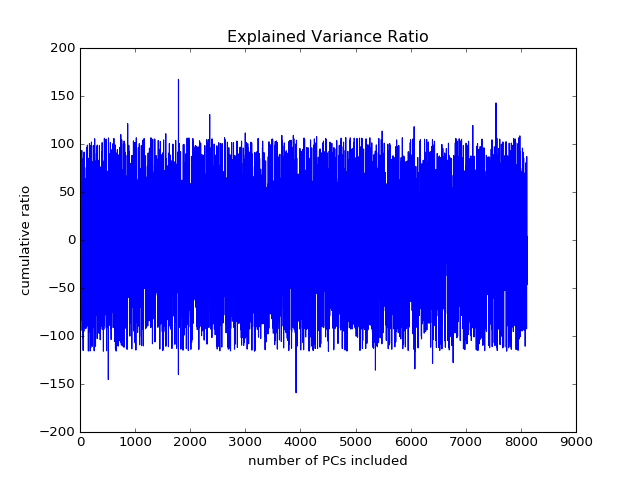

In [57]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
ratio_fig = plt.figure()
plt.plot(cum_sum[:200] / np.sum(pca.explained_variance_ratio_),'r')
plt.xlabel('number of PCs included')
plt.ylabel('cumulative ratio')
plt.title('Explained Variance Ratio')
plt.show()

<IPython.core.display.Javascript object>


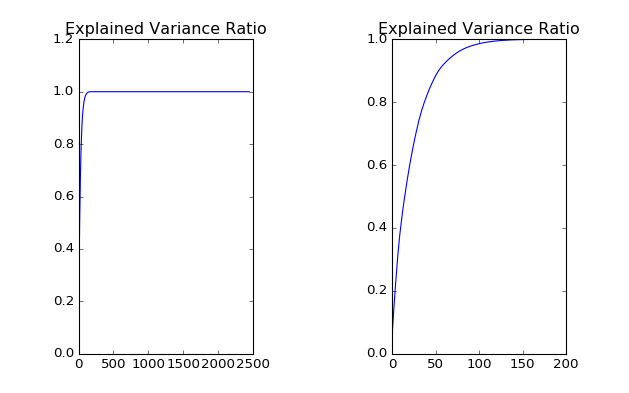

In [54]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
fig1, axs1 = plt.subplots(1,2, figsize=(3, 2), facecolor='w', edgecolor='k')
fig1.subplots_adjust(hspace = .8, wspace=.8)
axs1 = axs1.ravel()
fig1.set_size_inches(8,6)
axs1[0].plot(cum_sum / np.sum(pca.explained_variance_ratio_))
#axs1[0].xaxis.label= 'Number of PCs included'
#axs1[0].yaxis.label = 'Cumulative ratio'
axs1[0].set_title('Explained Variance Ratio')

axs1[1].plot(cum_sum[:200] / np.sum(pca.explained_variance_ratio_))
#axs1[1].xaxis.label = 'Number of PCs included'
#axs1[1].yaxis.label = 'Cumulative ratio'
axs1[1].set_title('Explained Variance Ratio')
#plt.show()

<IPython.core.display.Javascript object>


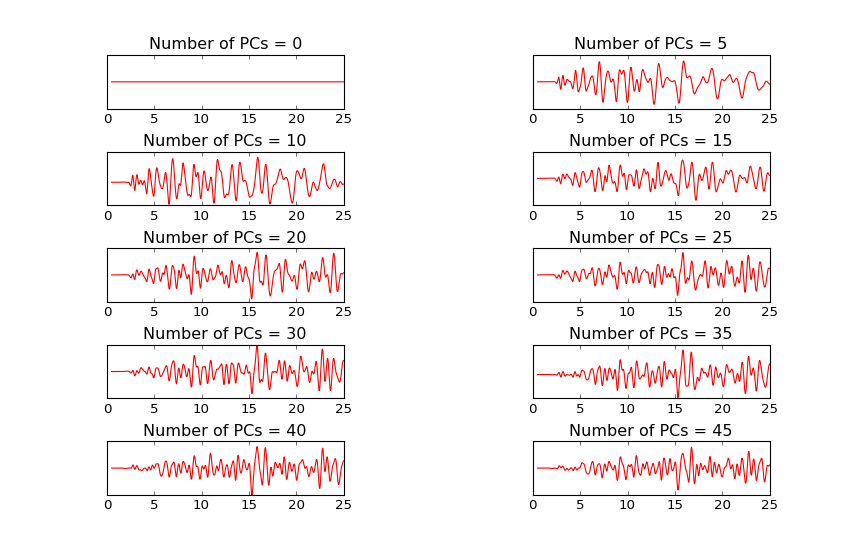

In [34]:
fig, axs = plt.subplots(5,2, figsize=(6, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.8)
axs = axs.ravel()
fig.set_size_inches(8,6)
for i in range(10):
    new_plot = np.zeros_like(pca.components_[0])
    for j in range(int(i*5)):
        new_plot += pca.components_[j]
    axs[i].plot(r_grid, new_plot,'r')
    axs[i].set_title('Number of PCs = {}'.format(i*5))
    axs[i].yaxis.set_visible(False)

In [41]:
ss = axs1[0]

In [ ]:
ss.xaxis.label

In [110]:
def cal_score(obs, loading):
    score_list = []
    loading_dim = np.shape(loading)
    for i in range(loading_dim[0]):
        score_val = np.dot(loading[i,], obs)
        score_list.append(score_val)
    return np.array(score_list)

def reconstruct(obs, mean, score, loading, PC_num):
    reconstruct = np.zeros_like(mean)
    #print(reconstruct)
    for i in range(PC_num):
        reconstruct += loading[i,] * score[i,]
    return reconstruct + mean

def PC_projection(data, loading, PC_ind):
    data_dim = np.shape(data)
    PC = loading[PC_ind]
    score_to_PC = []
    for i in range(data_dim[0]):
        score_to_PC.append(np.dot(PC, data[i]))
    return np.array(score_to_PC).reshape(data_dim[0],1)

def sort_ind(array):
    return sorted(range(len(array)), key=lambda k: array[k])

[['Nd1Ho1In2.cif'], ['Cu1S1.cif'], ['Sm1S1.cif'], ['La1Ag1.cif'], ['Hg1Se1.cif']]


<IPython.core.display.Javascript object>


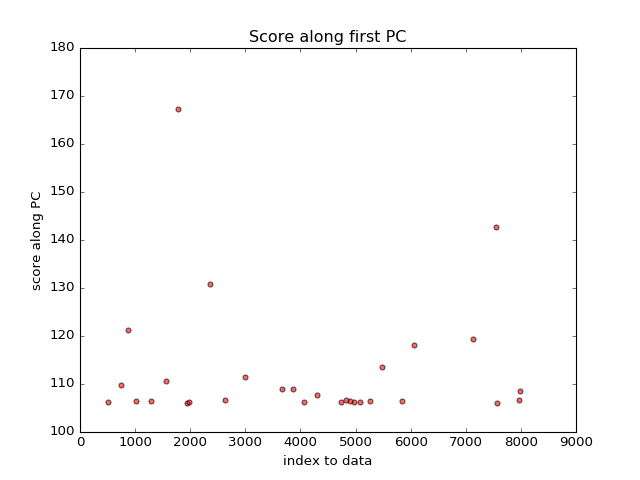

In [106]:
# score along PC
loading = copy.copy(pca.components_)
pc_project_1 = PC_projection(gr_list, loading, 1)
sorted_ind = sort_ind(pc_project_1)
sorted_ind_30 = sorted_ind[-30:]
top5_el_list = []
for el in sorted_ind[-5:]:
    top5_el_list.append(el_list[el])
print(top5_el_list)
pc_fig = plt.figure()
plt.scatter(sorted_ind[-30:], pc_project_1[sorted_ind[-30:]], c='r', alpha=0.6)
plt.xlabel('index to data')
plt.ylabel('score along PC')
plt.title('Score along first PC')
plt.show()

<IPython.core.display.Javascript object>


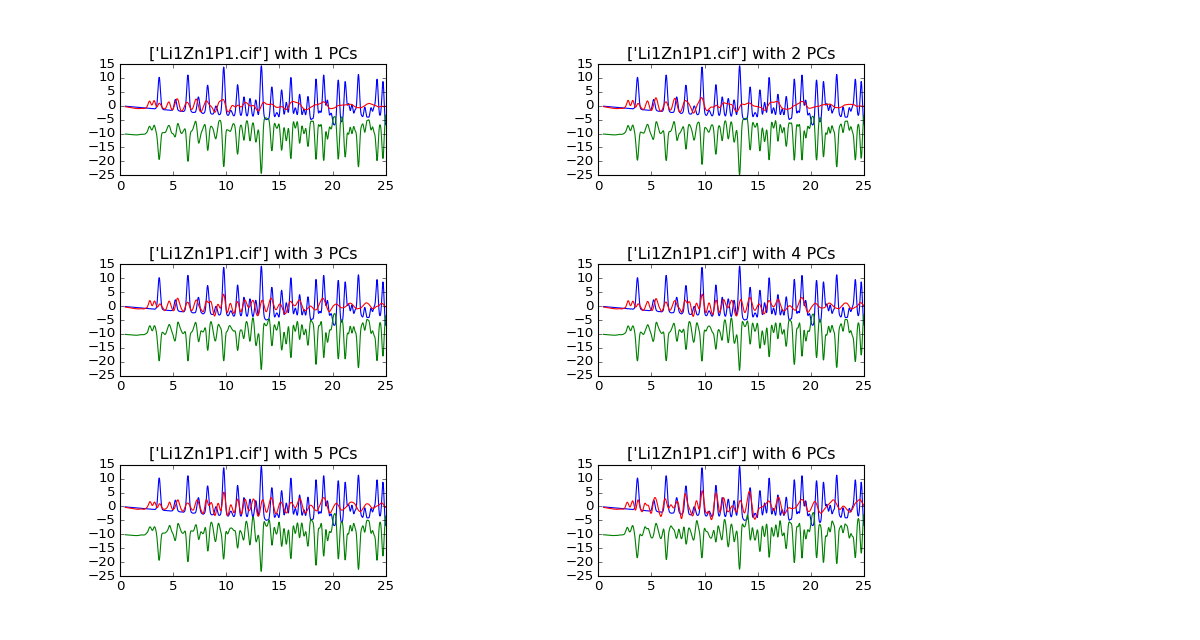

In [124]:
ind = 255
obs = gr_list[ind]
mean = copy.copy(pca.mean_)
loading = copy.copy(pca.components_)
score = cal_score(obs, loading)

fig, axs = plt.subplots(3,2, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.8)
axs = axs.ravel()
for i in range(6):
    PC_num = (i+1)
    recon = reconstruct(obs, mean, score, loading, PC_num)
    axs[i].plot(r_grid, obs, 'b')
    axs[i].plot(r_grid, recon, 'r')
    axs[i].plot(r_grid, -((obs-recon)+10), 'g')
    axs[i].set_title('{} with {} PCs'.format(el_list[ind], PC_num))
fig.set_size_inches(12, 8, forward=False)

<IPython.core.display.Javascript object>


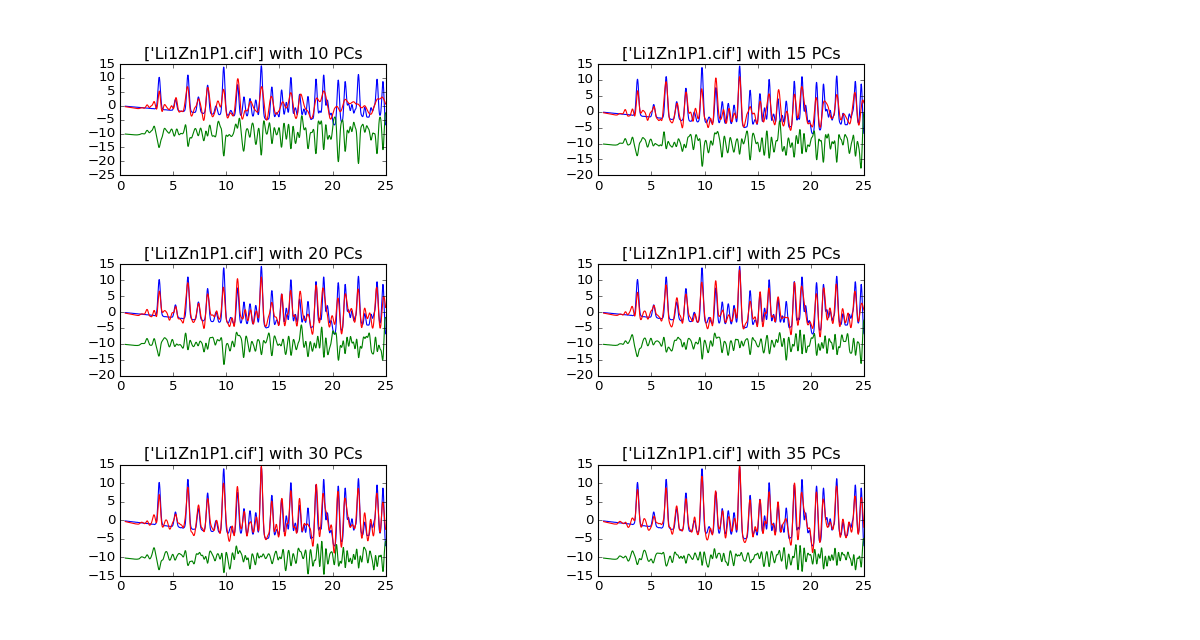

In [126]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.8)
axs = axs.ravel()
for i in range(6):
    PC_num = (i+2)*5
    recon = reconstruct(obs, mean, score, loading, PC_num)
    axs[i].plot(r_grid, obs, 'b')
    axs[i].plot(r_grid, recon, 'r')
    axs[i].plot(r_grid, -((obs-recon)+10), 'g')
    axs[i].set_title('{} with {} PCs'.format(el_list[ind], PC_num))
fig.set_size_inches(12, 8, forward=False)

<IPython.core.display.Javascript object>


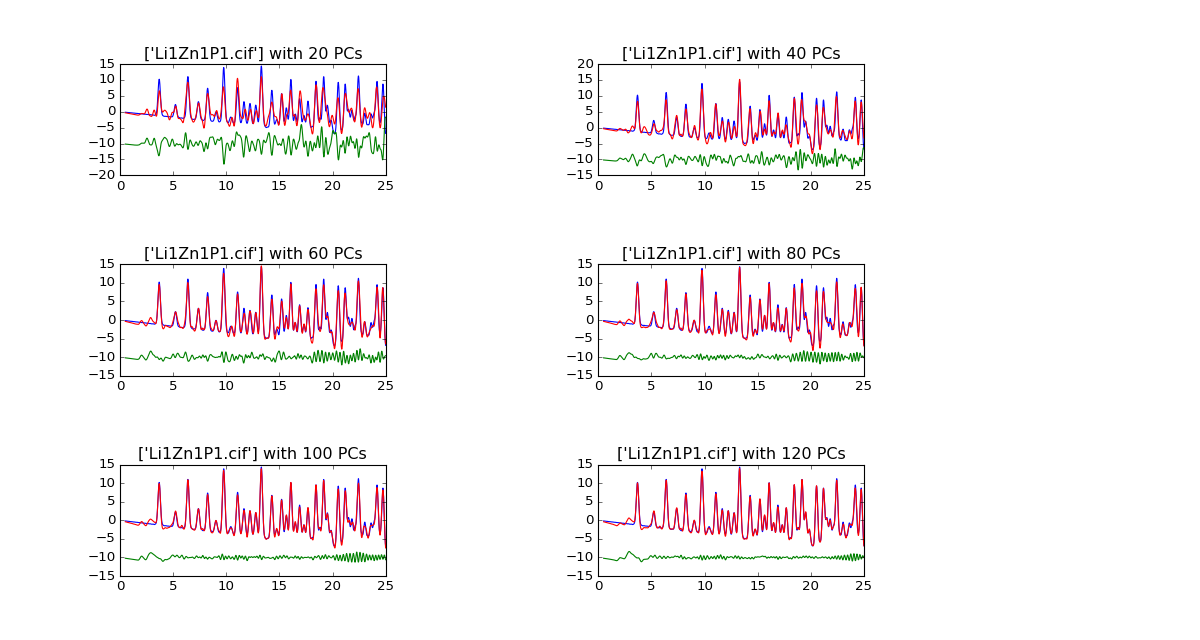

In [122]:
fig, axs = plt.subplots(3,2, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.8)
axs = axs.ravel()
for i in range(6):
    PC_num = (i+1)*20
    recon = reconstruct(obs, mean, score, loading, PC_num)
    axs[i].plot(r_grid, obs, 'b')
    axs[i].plot(r_grid, recon, 'r')
    axs[i].plot(r_grid, -((obs-recon)+10), 'g')
    axs[i].set_title('{} with {} PCs'.format(el_list[ind], PC_num))
fig.set_size_inches(12, 8, forward=False)

<IPython.core.display.Javascript object>


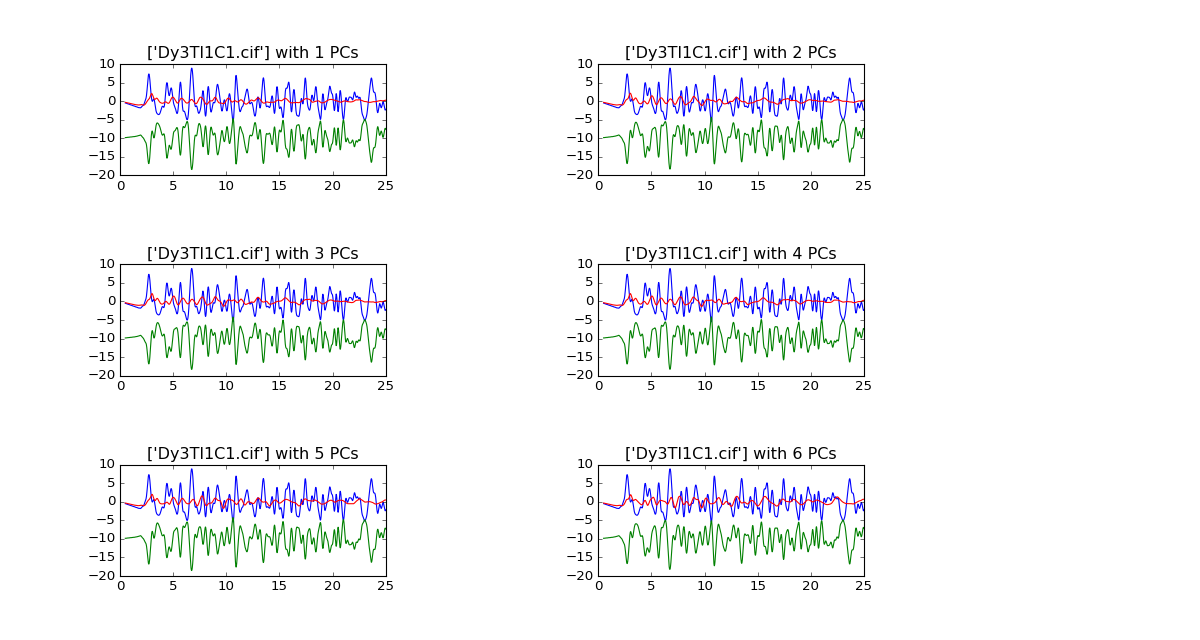

In [127]:
ind = 377
obs = gr_list[ind]
mean = copy.copy(pca.mean_)
loading = copy.copy(pca.components_)
score = cal_score(obs, loading)

fig, axs = plt.subplots(3,2, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.8)
axs = axs.ravel()
for i in range(6):
    PC_num = (i+1)
    recon = reconstruct(obs, mean, score, loading, PC_num)
    axs[i].plot(r_grid, obs, 'b')
    axs[i].plot(r_grid, recon, 'r')
    axs[i].plot(r_grid, -((obs-recon)+10), 'g')
    axs[i].set_title('{} with {} PCs'.format(el_list[ind], PC_num))
fig.set_size_inches(12, 8, forward=False)

<IPython.core.display.Javascript object>


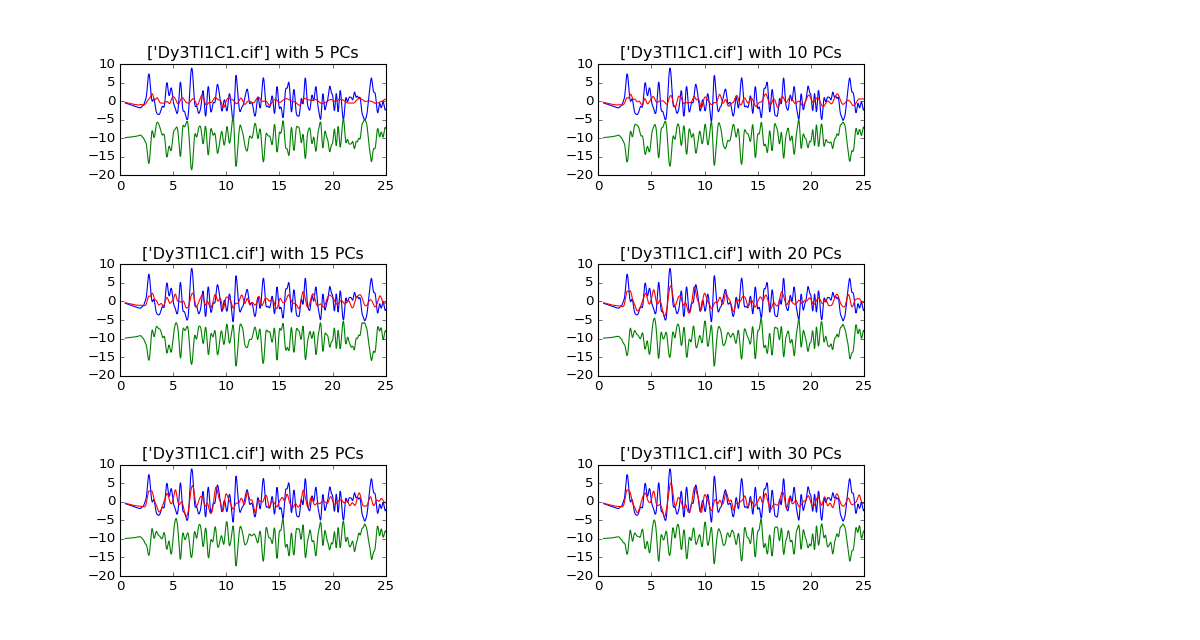

In [128]:
ind = 377
obs = gr_list[ind]
mean = copy.copy(pca.mean_)
loading = copy.copy(pca.components_)
score = cal_score(obs, loading)

fig, axs = plt.subplots(3,2, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.8)
axs = axs.ravel()
for i in range(6):
    PC_num = (i+1)*5
    recon = reconstruct(obs, mean, score, loading, PC_num)
    axs[i].plot(r_grid, obs, 'b')
    axs[i].plot(r_grid, recon, 'r')
    axs[i].plot(r_grid, -((obs-recon)+10), 'g')
    axs[i].set_title('{} with {} PCs'.format(el_list[ind], PC_num))
fig.set_size_inches(12, 8, forward=False)

<IPython.core.display.Javascript object>


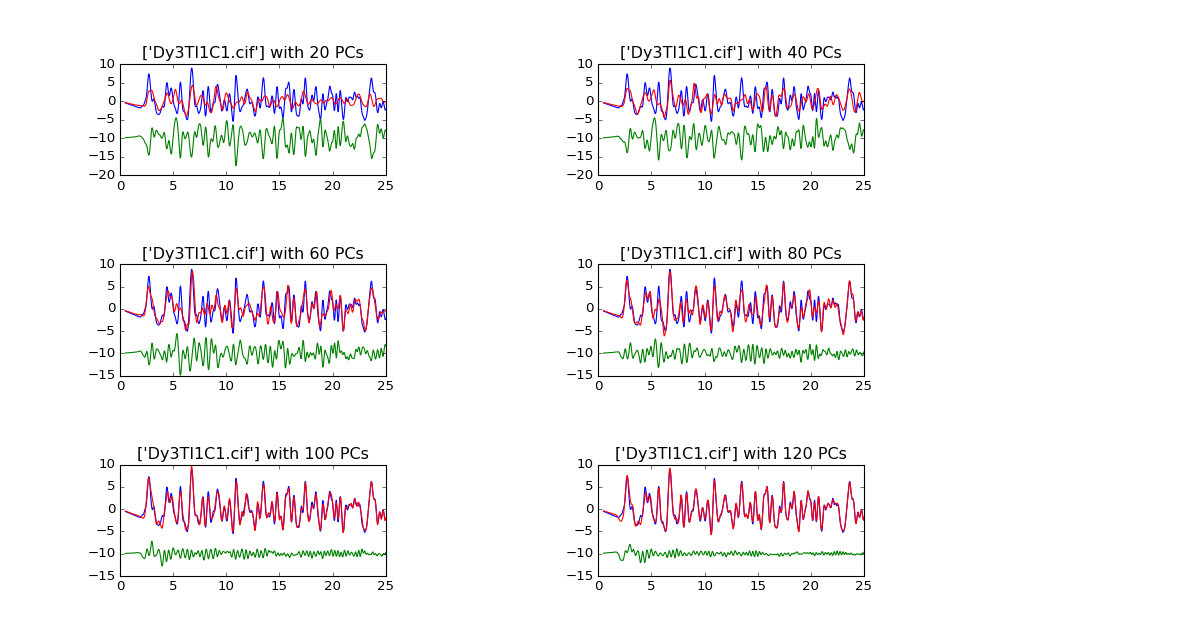

In [129]:
ind = 377
obs = gr_list[ind]
mean = copy.copy(pca.mean_)
loading = copy.copy(pca.components_)
score = cal_score(obs, loading)

fig, axs = plt.subplots(3,2, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.8)
axs = axs.ravel()
for i in range(6):
    PC_num = (i+1)*20
    recon = reconstruct(obs, mean, score, loading, PC_num)
    axs[i].plot(r_grid, obs, 'b')
    axs[i].plot(r_grid, recon, 'r')
    axs[i].plot(r_grid, -((obs-recon)+10), 'g')
    axs[i].set_title('{} with {} PCs'.format(el_list[ind], PC_num))
fig.set_size_inches(12, 8, forward=False)

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


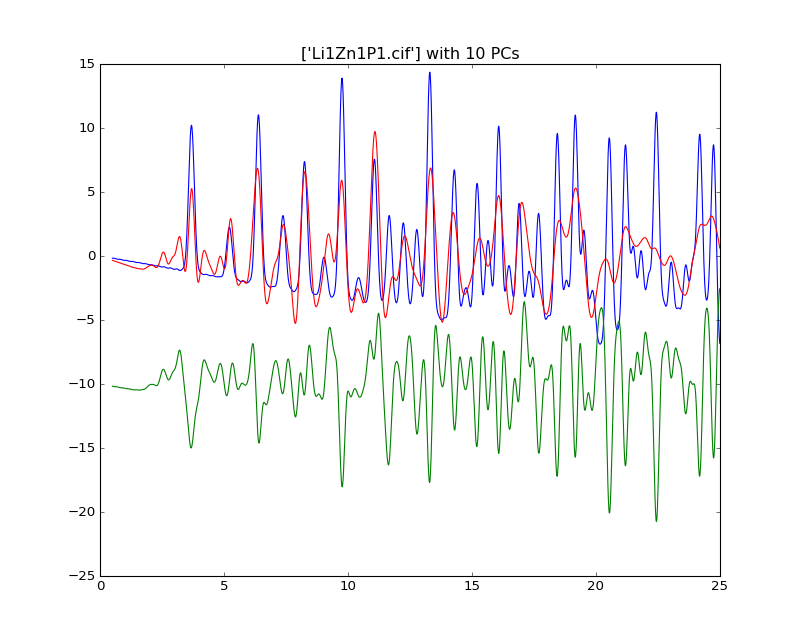

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


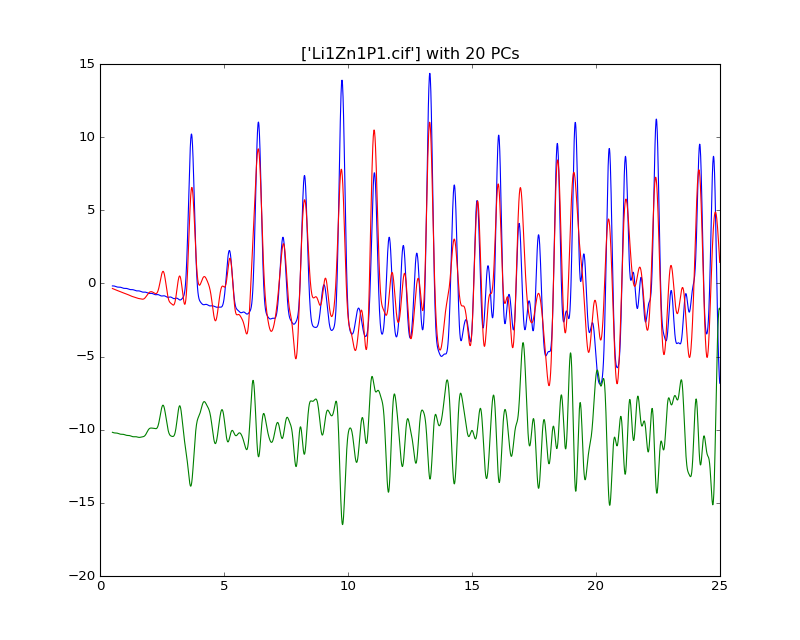

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


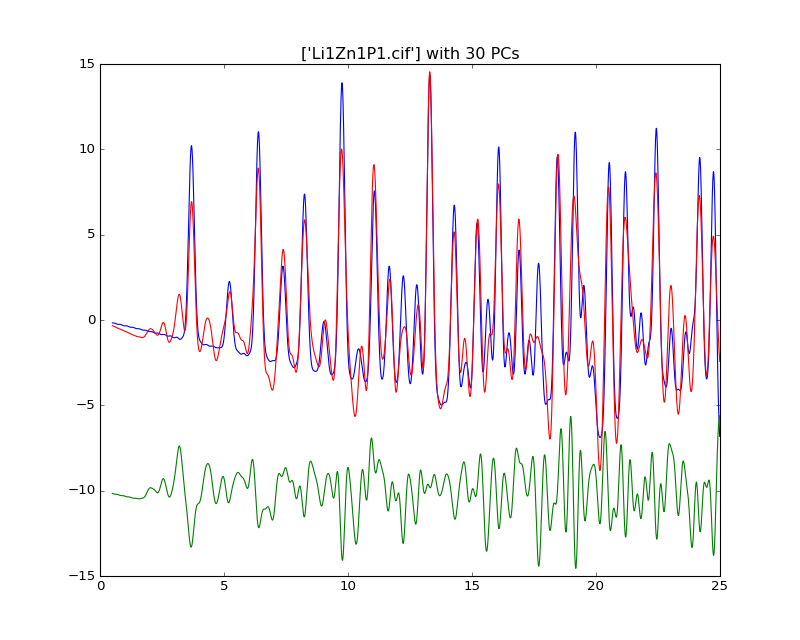

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


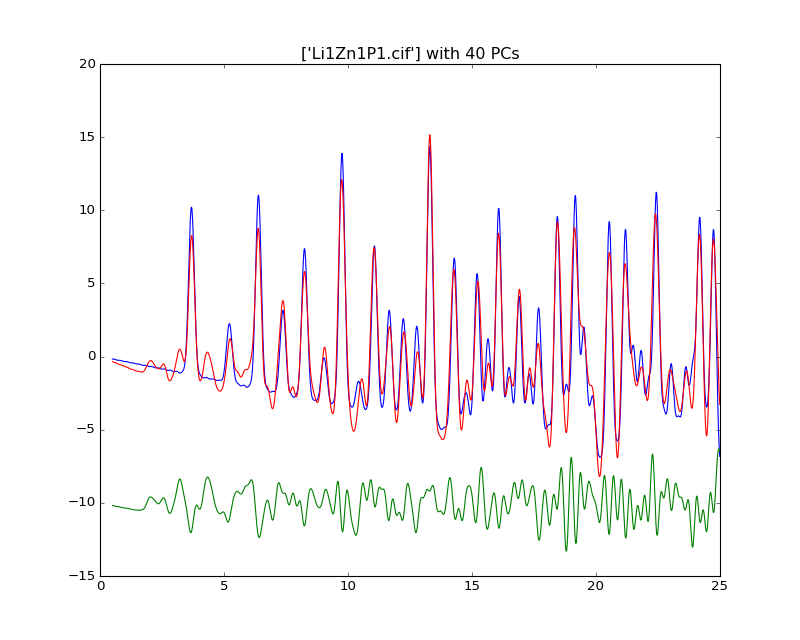

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


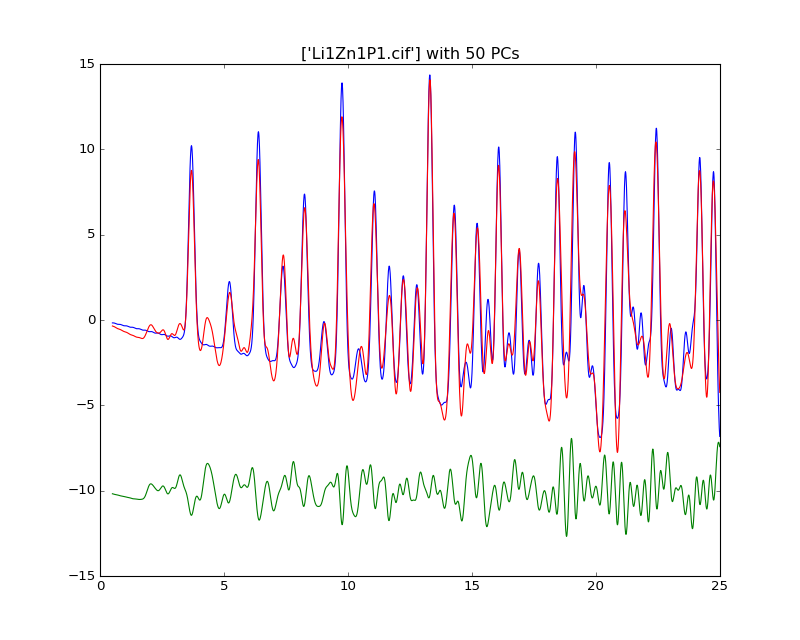

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


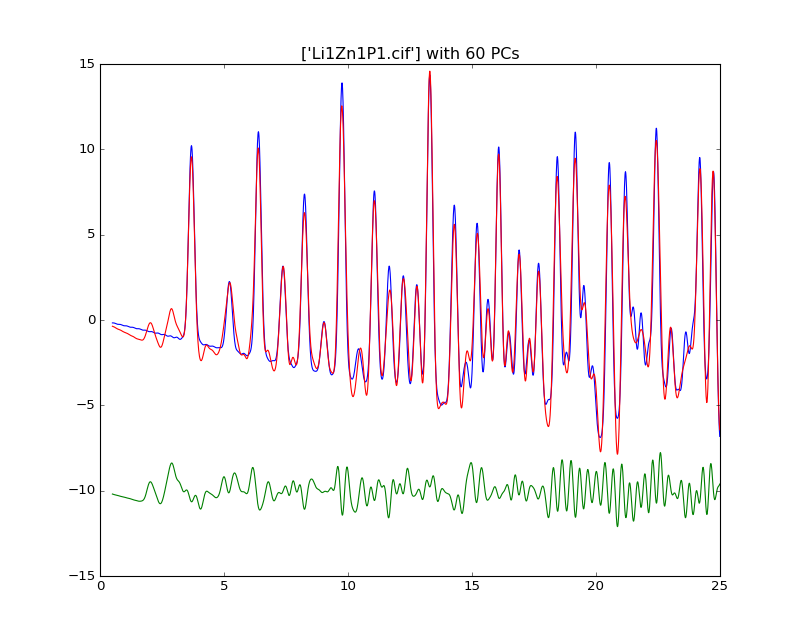

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


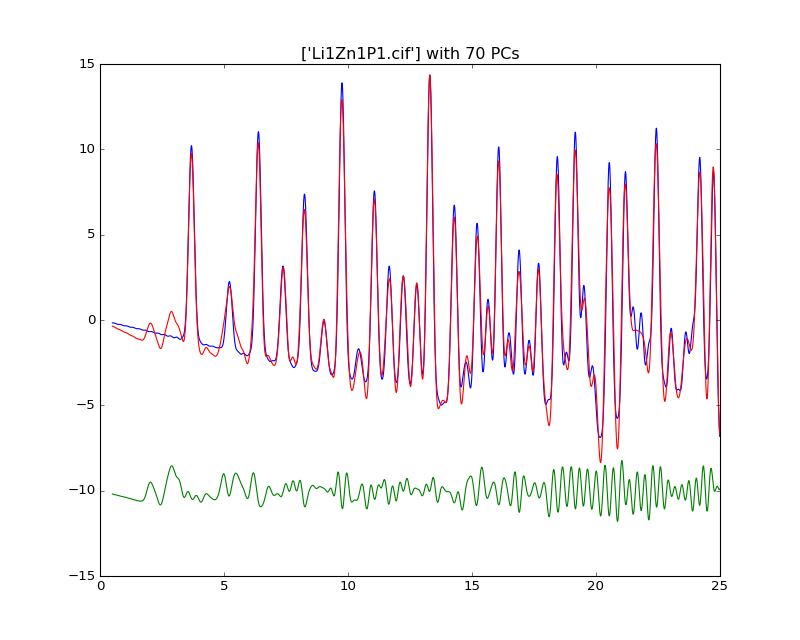

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


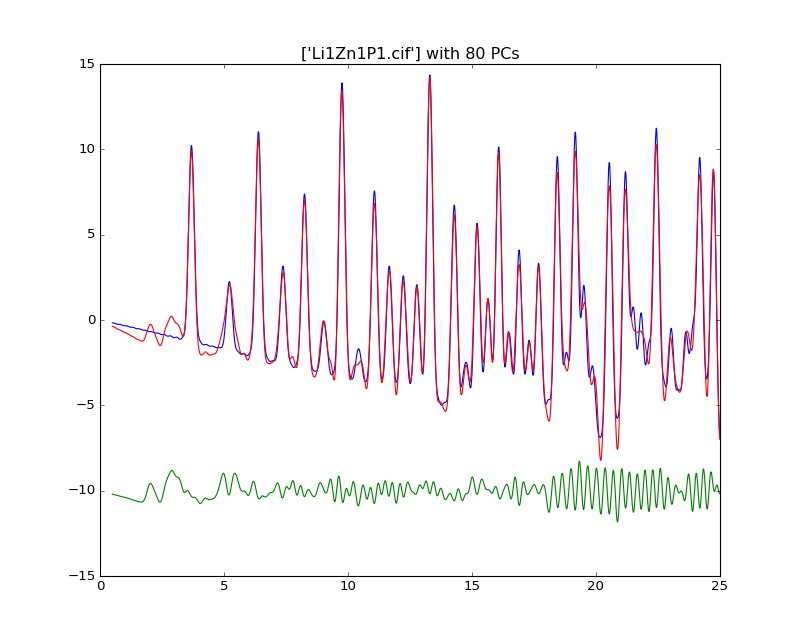

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


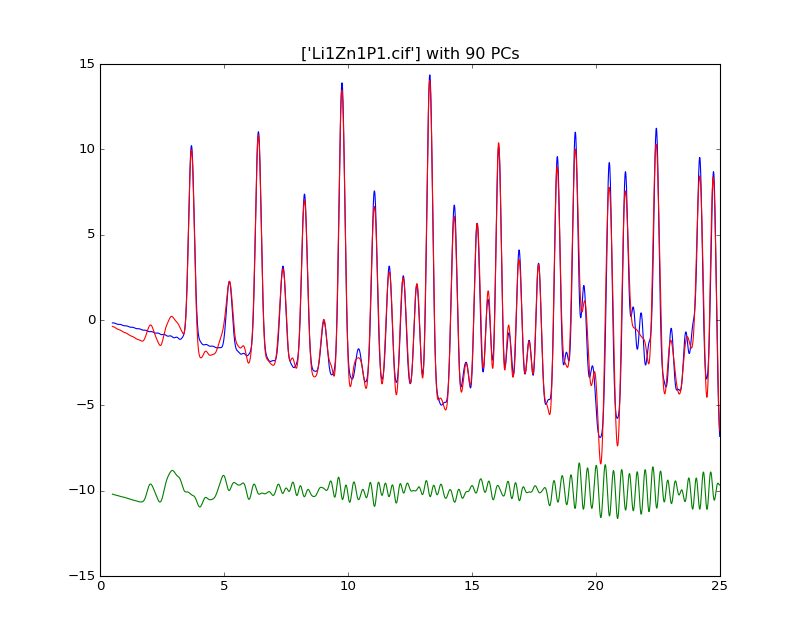

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


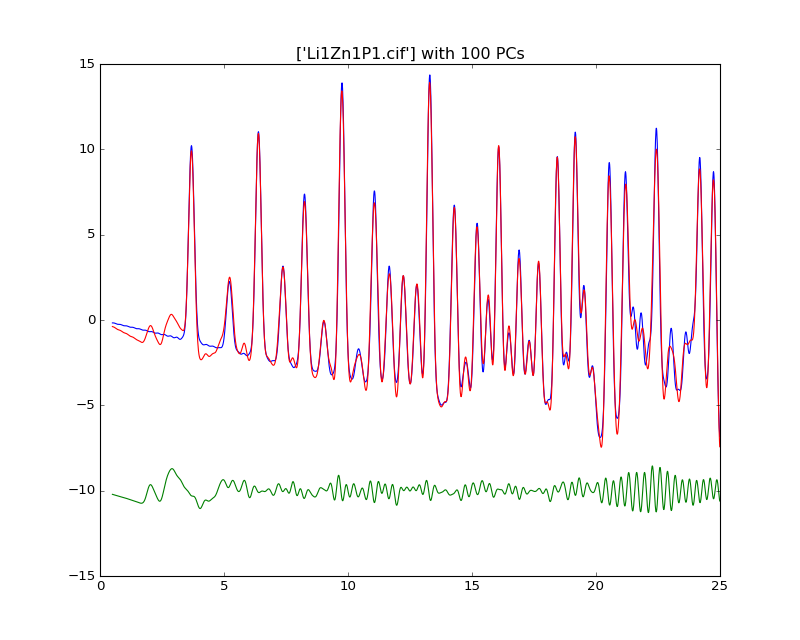

In [26]:
ind = 255
obs = gr_list[ind]
mean = copy.copy(pca.mean_)
loading = copy.copy(pca.components_)
score = cal_score(obs, loading)
for i in range(10):
    PC_num = (i+1)*10
    recon = reconstruct(obs, mean, score, loading, PC_num)
    fig = plt.figure()
    plt.plot(r_grid, obs, 'b')
    plt.plot(r_grid, recon, 'r')
    plt.plot(r_grid, -((obs-recon)+10), 'g')
    plt.title('{} with {} PCs'.format(el_list[ind], PC_num))
    #plt.legend(['data','PCA reconstruct', 'diff'], loc=2)
    plt.show()
    fig.set_size_inches(10, 8, forward=True)

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


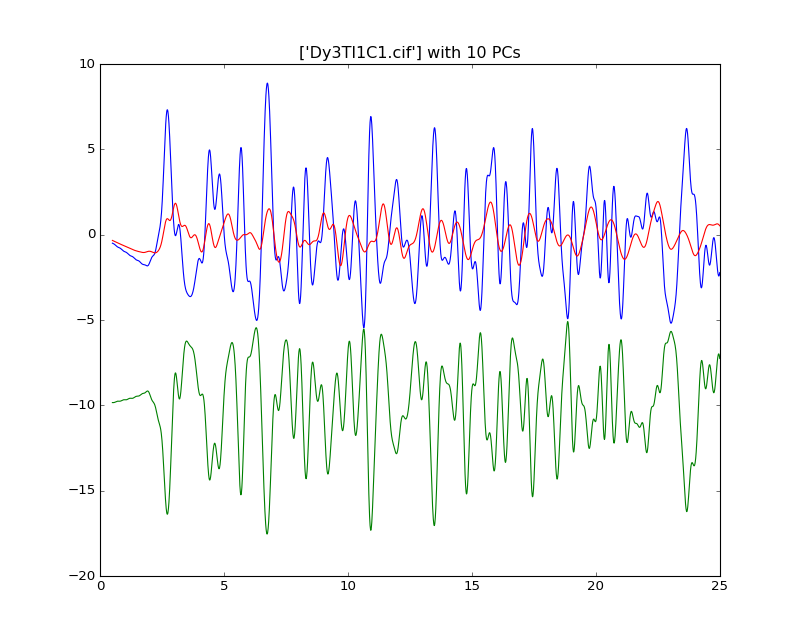

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


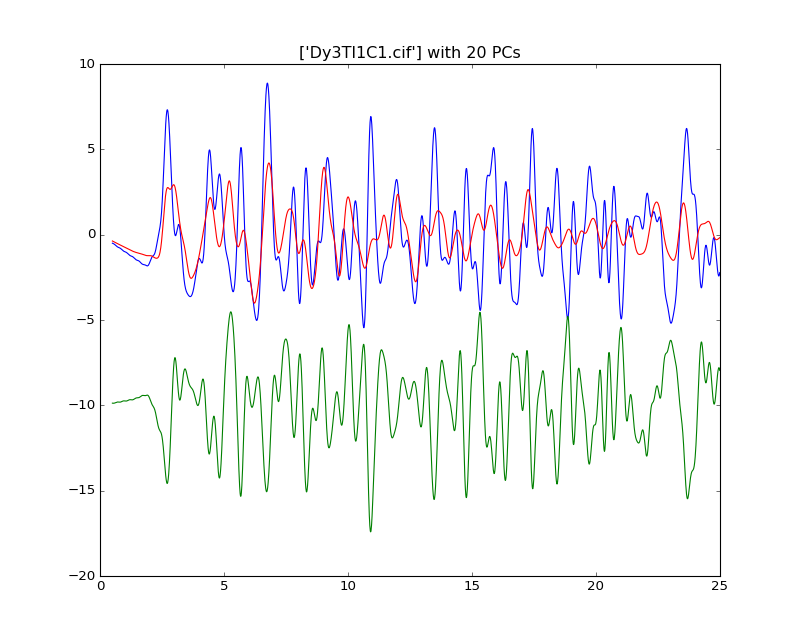

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


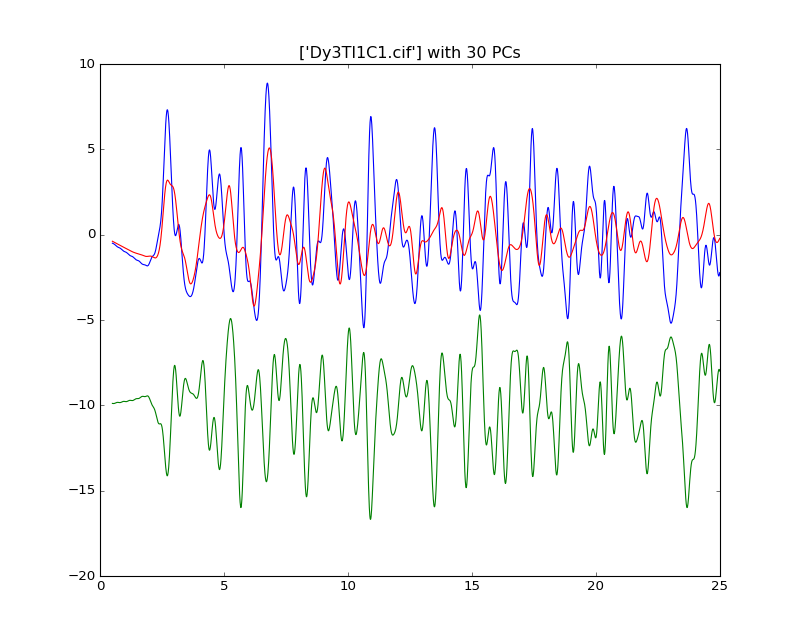

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


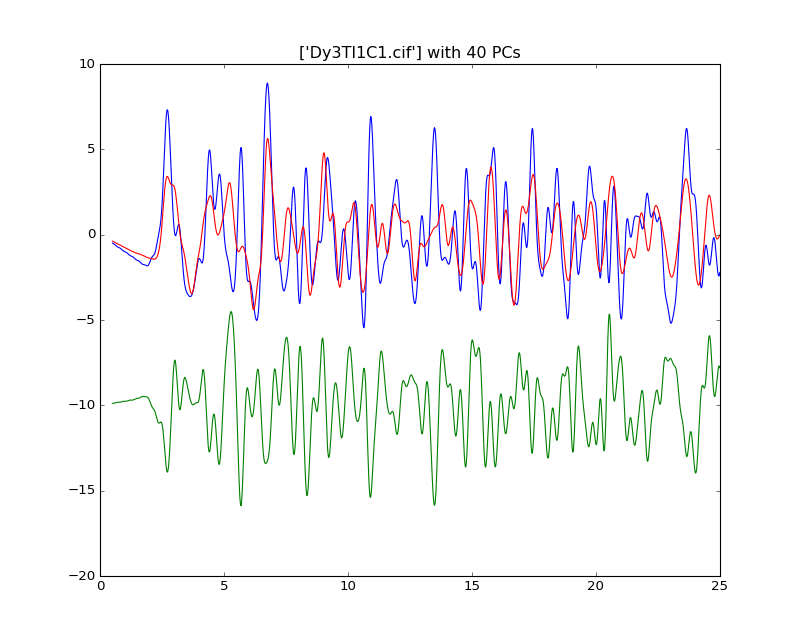

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


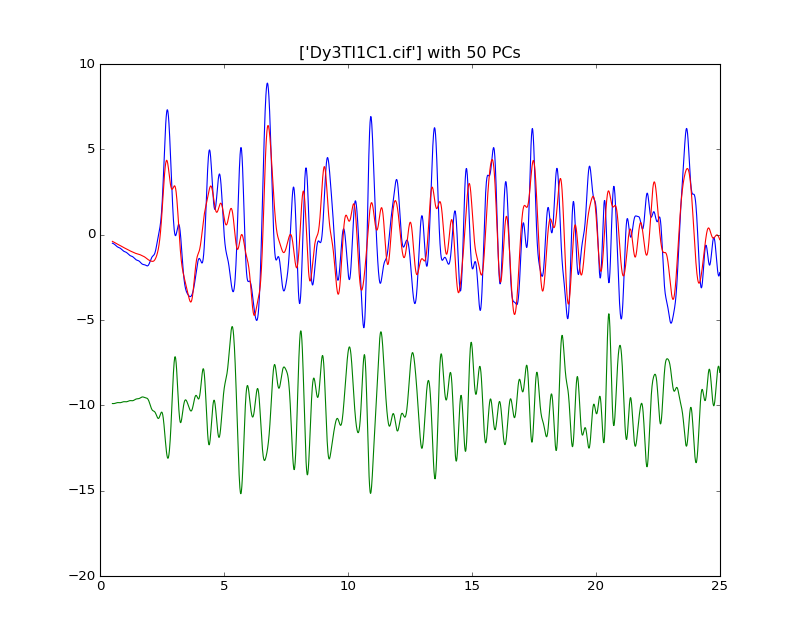

[ 0.  0.  0. ...,  0.  0.  0.]


/home/timothy/miniconda2/envs/ML/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


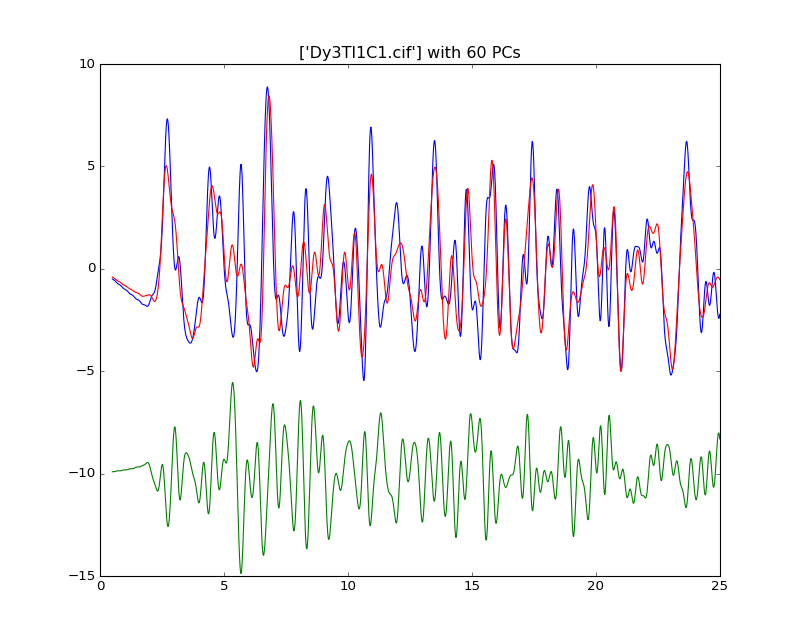

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


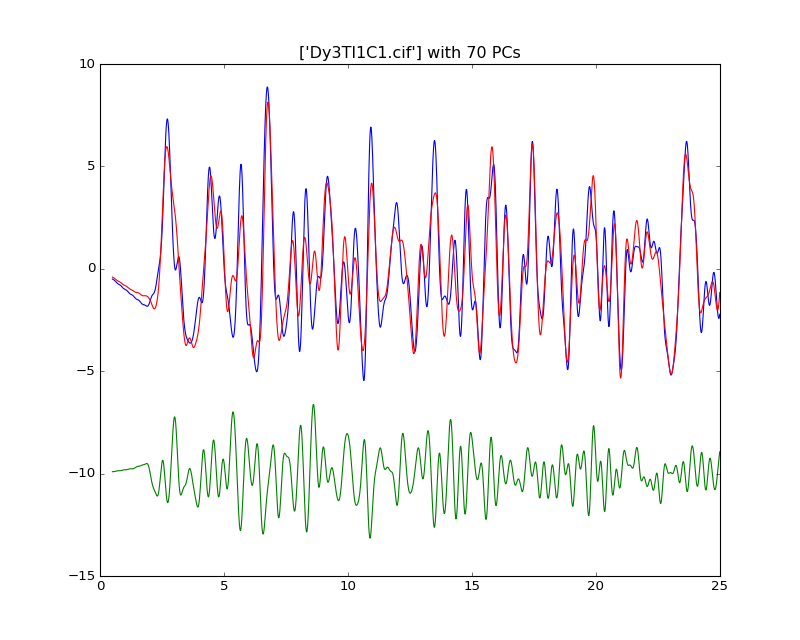

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


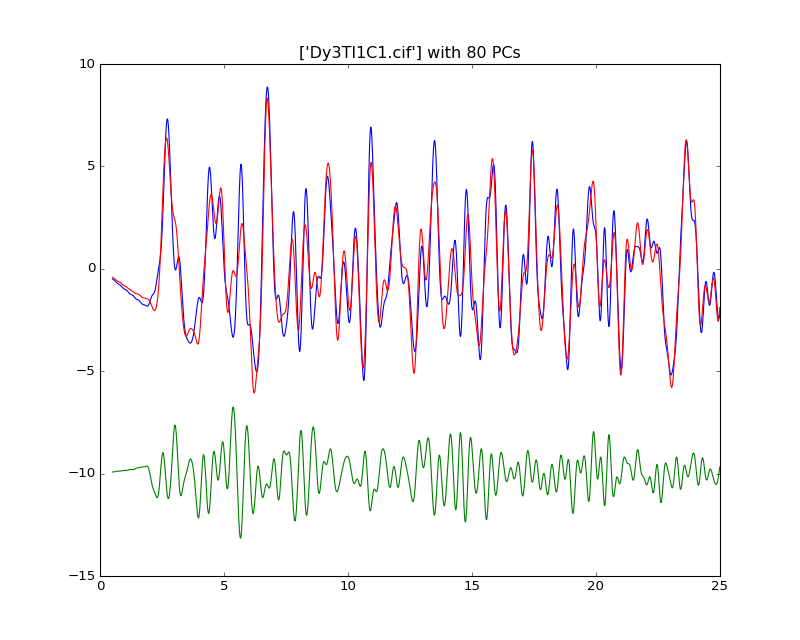

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


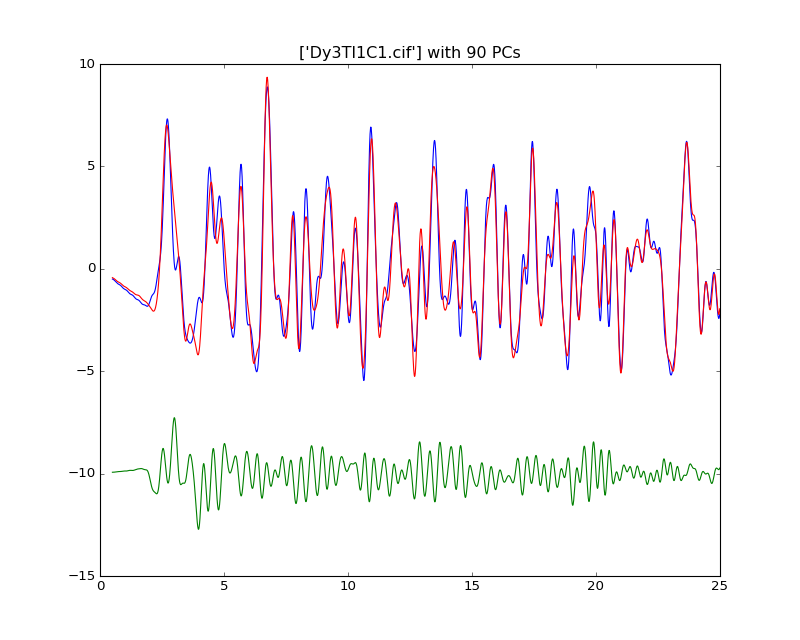

[ 0.  0.  0. ...,  0.  0.  0.]


<IPython.core.display.Javascript object>


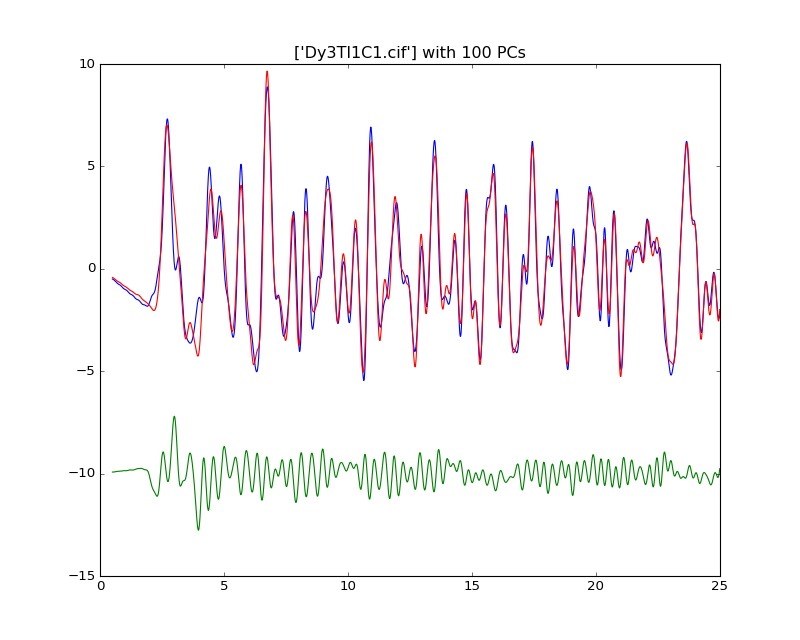

In [33]:
ind = 377
obs = gr_list[ind]
mean = copy.copy(pca.mean_)
loading = copy.copy(pca.components_)
score = cal_score(obs, loading)
for i in range(10):
    PC_num = (i+1)*10
    recon = reconstruct(obs, mean, score, loading, PC_num)
    fig = plt.figure()
    plt.plot(r_grid, obs, 'b')
    plt.plot(r_grid, recon, 'r')
    plt.plot(r_grid, -((obs-recon)+10), 'g')
    plt.title('{} with {} PCs'.format(el_list[ind], PC_num))
    #plt.legend(['data','PCA reconstruct', 'diff'], loc=2)
    plt.show()
    fig.set_size_inches(10, 8, forward=True)

In [ ]:
class myPCA(object):
    ''' inpout matrix dimension should be (num of observation) x (gr points)'''
    def __init__(self, data, el_list = None, sg_list = None):
        self.data = data
        print('your data dimension = {}'.format(np.shape(self.data)))
        self.mean_data = np.mean(data, axis=0)
        if not el_list:
            self.element_list = el_list
        if not sg_list:
            self.space_group_list = sg_list
        
    def fit(self):
        center_mat = self.data - self.mean_data
        cov_mat = np.dot(np.transpose(center_mat), center_mat) / float(np.shape(self.data)[0])
        #cov_mat = np.cov(center_mat, rowvar=0)
        (eig_val, loading) = np.linalg.eig(cov_mat)
        self.eig_val = np.real(eig_val)
        self.loading = np.real(loading)
        
    def cover_ratio(self):
        return np.cumsum(self.eig_val)/np.sum(self.eig_val)
    
    def _cal_score(self, obs, debug=False):
        '''calculate scores of observation along every principle component'''
        print('dim of observation is {}'.format(np.shape(obs)))
        print('dim of loading is {}'.format(np.shape(self.loading)))
        score_list = []
        dim_loading = np.shape(self.loading)
        for i in range(dim_loading[0]):
            #print('processing loading {} over {}'.format(i, dim_loading[0]))
            score = np.dot(self.loading[i,], obs.T)
            if debug:
                score_shape = np.shape(score)
                print('shape of score = {}'.format(score_shape))
            score_list.append(score)
        score_list_output = np.array(score_list)
        print('dim of score = {}'.format(score_list_output.shape))
        print('End of score calculation....')
        return score_list_output
    
    def PC_reconstruct(self, obs_ind, PC_num):
        print('Start reconstruction.....')
        print('using {} principle componets to reconstruct data'.format(PC_num))
        print('index of observation taht is going to be reconstructed = {}'.format(obs_ind))
        obs = self.data[obs_ind]
        obs_dim = np.shape(obs)
        score = self._cal_score(obs)
        reconstruct = np.zeros(obs_dim) + self.mean_data
        for i in range(PC_num):
            reconstruct += np.dot(self.loading[i,],score[i])
        self._plot_and_compare(obs, reconstruct)
        pct_error = abs(reconstruct - obs)/abs(obs)
        return (reconstruct, obs, pct_error)
    
    def _plot_and_compare(self, obs, reconstruct):
        plt.figure()
        plt.plot(obs, 'r')
        plt.plot(reconstruct, 'bo')
        plt.show()
        return